In [1]:
import geoai

In [2]:
raster_url = (
    "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_train.tif"
)
vector_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_train_buildings.geojson"

In [3]:
raster_path = geoai.download_file(raster_url)

naip_train.tif: 100%|██████████| 12.1M/12.1M [00:03<00:00, 3.95MB/s]


In [4]:
vector_path = geoai.download_file(vector_url)

naip_train_buildings.geojson: 100%|██████████| 456k/456k [00:00<00:00, 2.73MB/s]


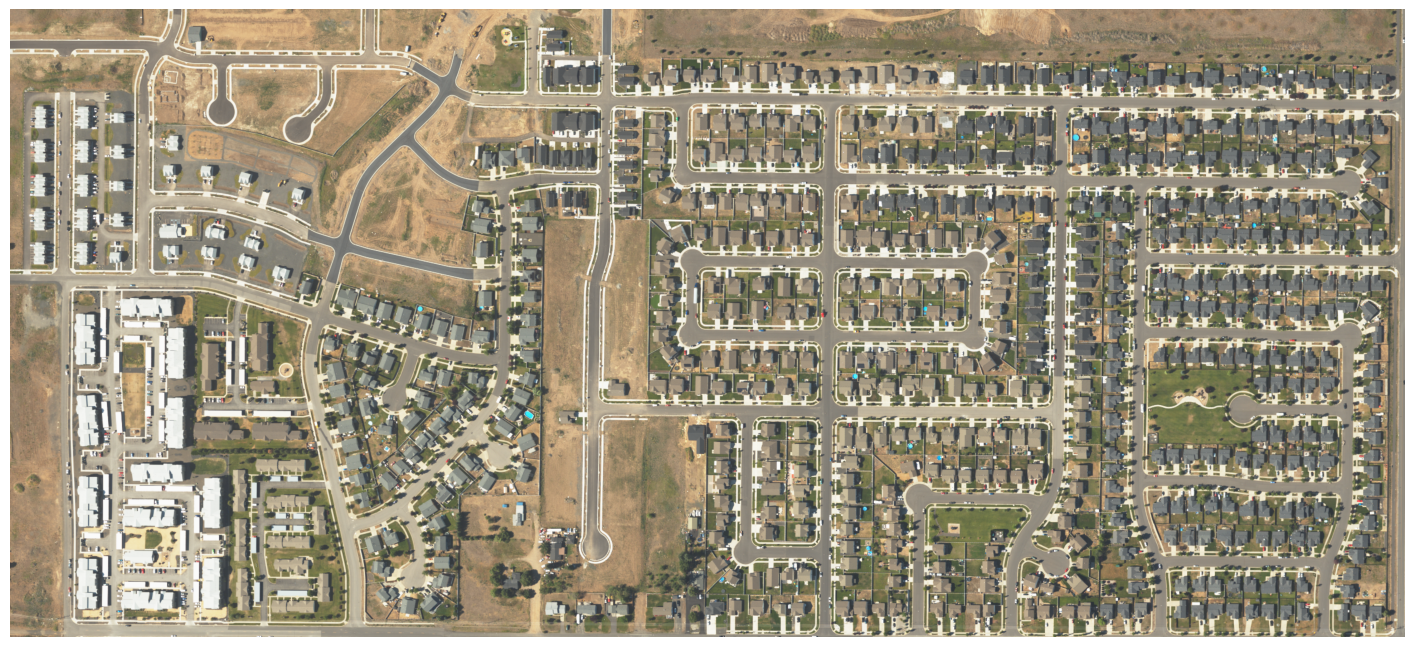

In [5]:
geoai.view_image(raster_path, figsize=(18, 10))

<Axes: >

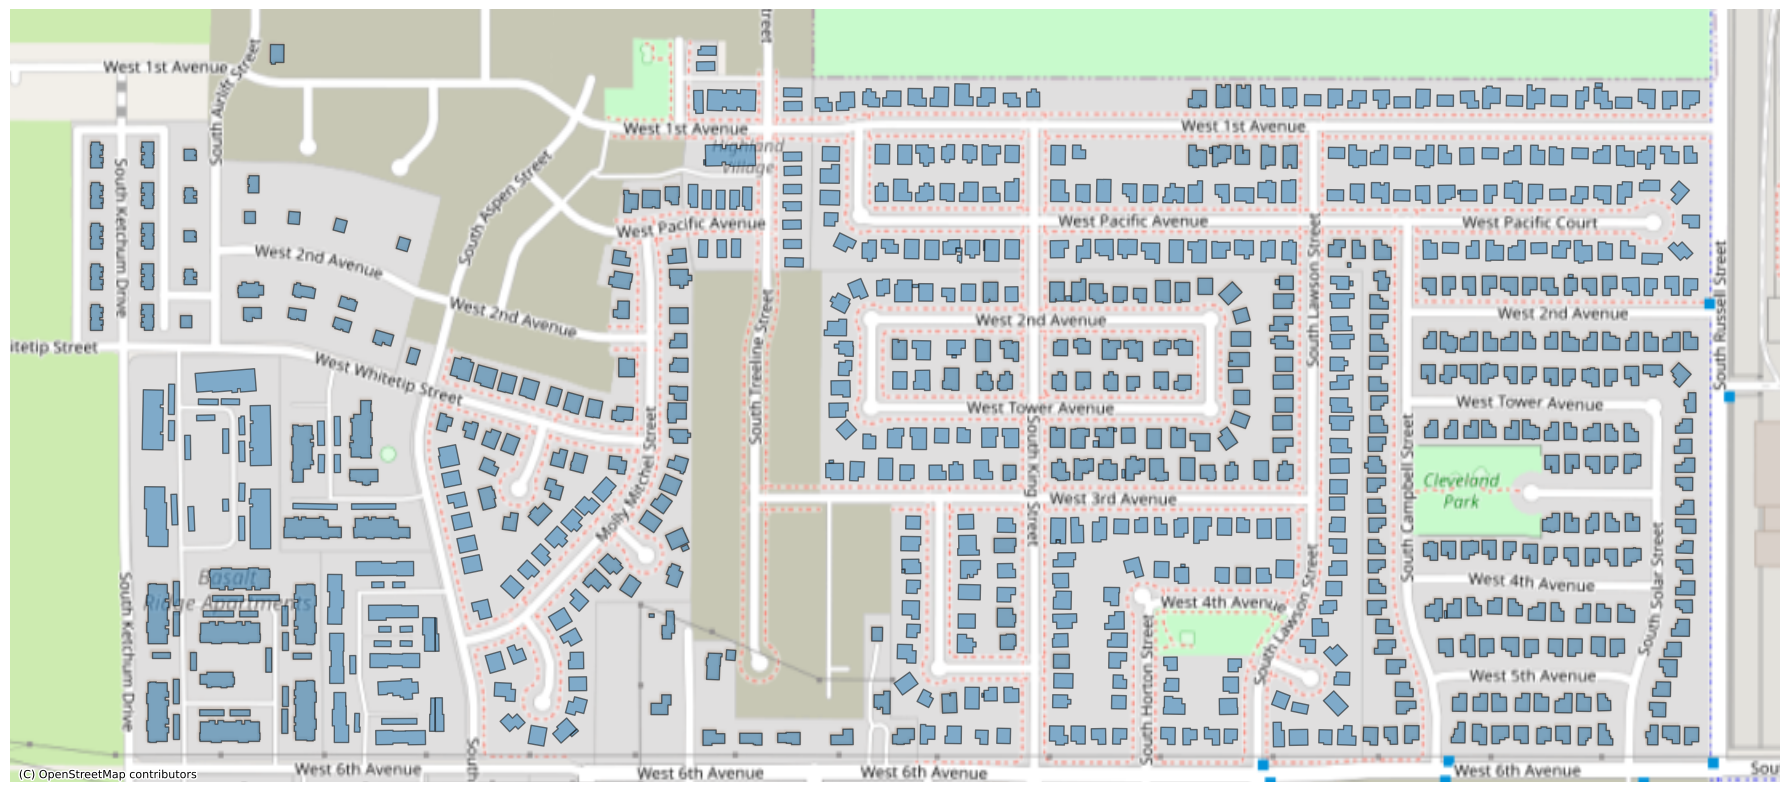

In [6]:
geoai.view_vector(vector_path, basemap=True, alpha=0.5, figsize=(18, 10))

In [7]:
geoai.view_vector_interactive(vector_path)

In [9]:
output_path = vector_path.replace(".geojson", ".tif")
geoai.vector_to_raster(vector_path, output_path, reference_raster=raster_path)

Reprojecting vector data from EPSG:4326 to EPSG:26911
Rasterized data saved to naip_train_buildings.tif


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(1126, 2503), dtype=uint8)

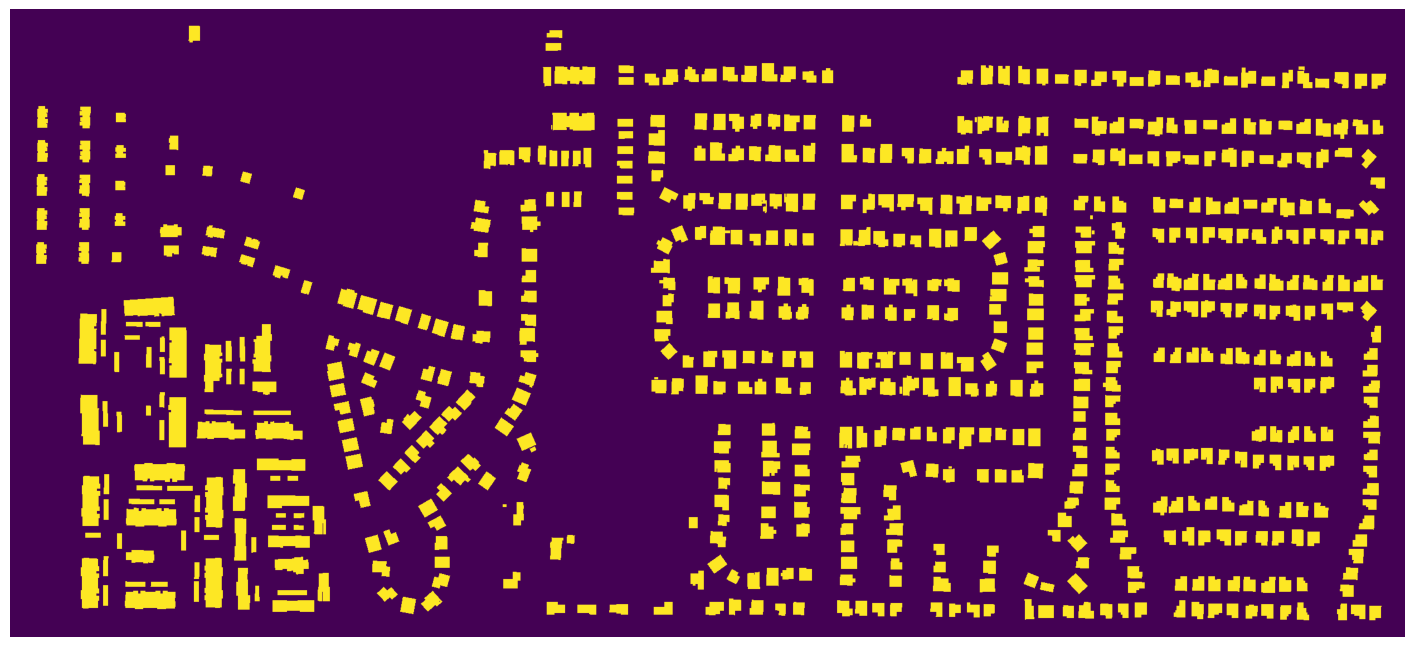

In [10]:
geoai.view_image(output_path, figsize=(18, 10))

In [11]:
titles = geoai.export_geotiff_tiles(
    in_raster=raster_path,
    out_folder="output",
    in_class_data=vector_path,
    tile_size=512,
    stride=256,
    buffer_radius=0,
    create_overview=True,
)


Raster info for naip_train.tif:
  CRS: EPSG:26911
  Dimensions: 2503 x 1126
  Resolution: (0.5999999999999953, 0.5999999999996691)
  Bands: 4
  Bounds: BoundingBox(left=454780.8, bottom=5277567.0, right=456282.6, top=5278242.6)
Loaded 722 features from naip_train_buildings.geojson
Vector CRS: EPSG:4326
Reprojecting features from EPSG:4326 to EPSG:26911
Found 6 unique classes: ['apartments' None 'terrace' 'detached' 'house' 'shed']


Generated: 36, With features: 36: 100%|██████████| 36/36 [00:03<00:00,  9.14it/s]


Overview image saved to output/overview.png

------- Export Summary -------
Total tiles exported: 36
Tiles with features: 36 (100.0%)
Average feature pixels per tile: 45951.7
Output saved to: output

------- Georeference Verification -------


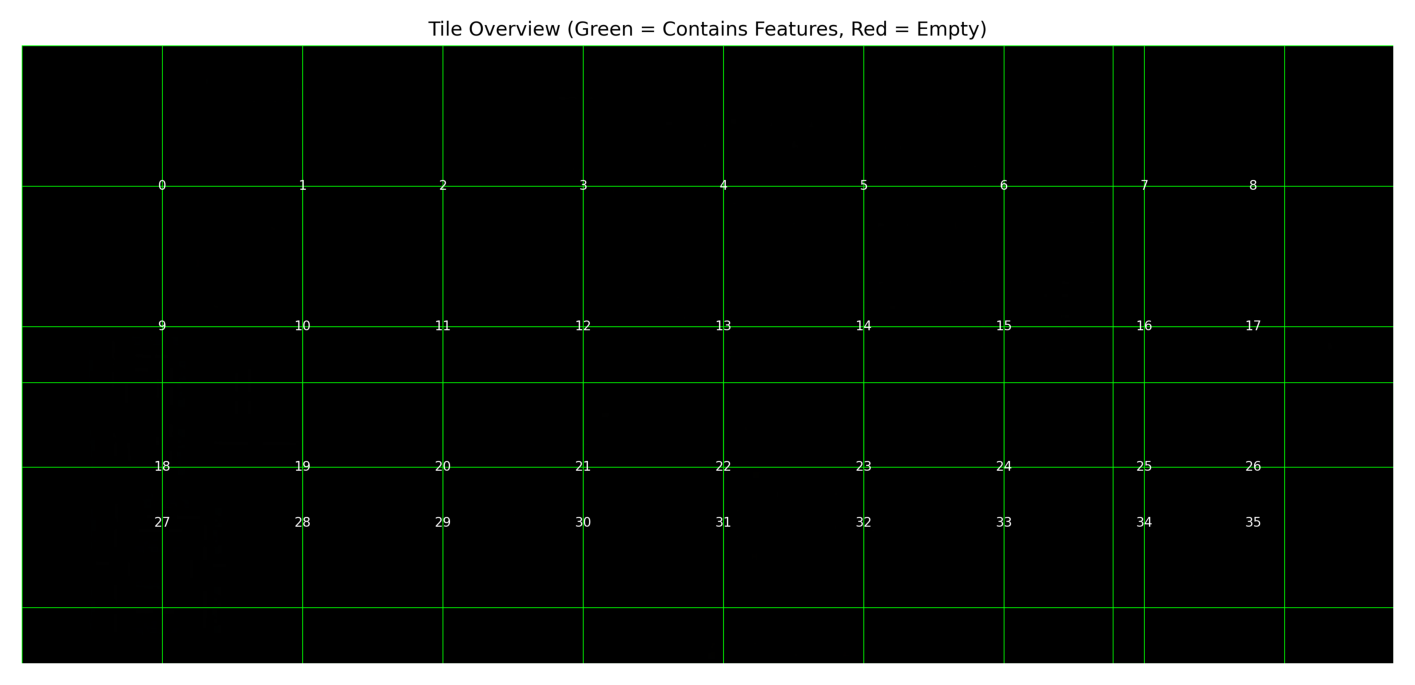

In [12]:
geoai.view_image("output/overview.png", figsize=(18, 10))

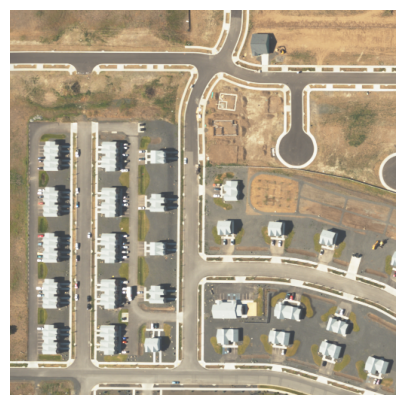

In [13]:
geoai.view_image("output/images/tile_000000.tif")

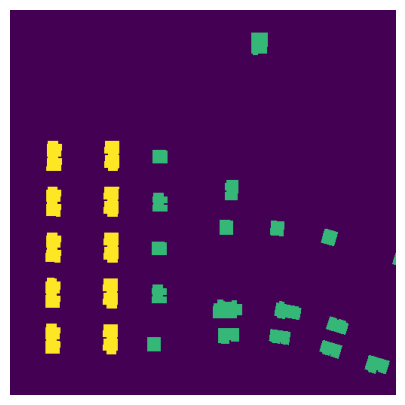

In [14]:
geoai.view_image("output/labels/tile_000000.tif")

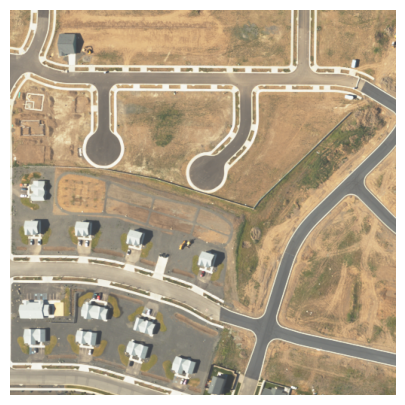

In [15]:
geoai.view_image("output/images/tile_000001.tif")

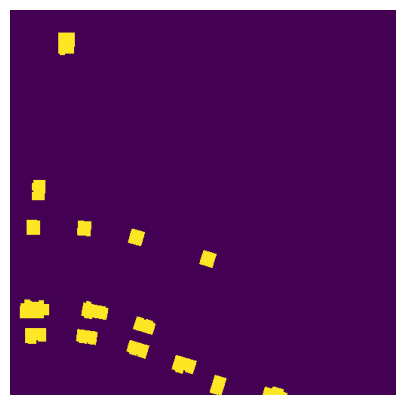

In [16]:
geoai.view_image("output/labels/tile_000001.tif")